# Library Import

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data and Return Dataframes

In [14]:
countries=["Switzerland", "Thailand", "Turkey", "United Kingdom", "United States", "World", "Zimbabwe"]
indic=["Mortality rate, under-5 (per 1,000 live births)", "Population, total"]

In [25]:
print(*countries,sep=", ")

Switzerland, Thailand, Turkey, United Kingdom, United States, World, Zimbabwe


In [15]:
def filereader(filename):
    data=open(filename,"r+").read()     # read data in WB format
    data=data[85:]
    file=open("x.csv","w+").write(data)    # store temp data
    file=pd.read_csv("x.csv")
    file=file.fillna(file.mean())
    yrcols=file.columns.tolist()[4:-1]    # take year columns
    file=file[(file['Indicator Name']==indic[0])|((file['Indicator Name']==indic[1]))]    # filter data by indicator
    fltr=file['Country Name'].isin(countries)
    file=file[fltr]
    cntr=file['Country Name'].tolist()
    indx=file['Indicator Name'].tolist()
    d1=[]
    for i in range(len(indx)):
        d1.append(cntr[i]+"-"+indx[i])    # craeting new column by conbining country and indicator
    file.insert(4,"Country with Indicator",d1)
    file1=file.T.iloc[4:][:-1]
    # drop unnecessary features
    file=file.reset_index(drop=True).drop(['Unnamed: 65','Country Code','Indicator Code','Country with Indicator'],axis=1)
    file1.columns=file1.iloc[0]
    file1=file1.iloc[1:]
    file1['Year']=yrcols
    file1=file1.set_index("Year")
    return file,file1  

In [16]:
df,df1=filereader("API_19_DS2_en_csv_v2_3931355.csv")

In [17]:
df.head()   # First Data with Year Column

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Switzerland,"Population, total",5327827.0,5434294.0,5573815.0,5694247.0,5789228.0,5856472.0,5918002.0,5991785.0,...,7912398.0,7996861.0,8089346.0,8188649.0,8282396.0,8373338.0,8451840.0,8514329.0,8575280.0,8636896.0
1,Switzerland,"Mortality rate, under-5 (per 1,000 live births)",26.5,26.0,25.3,24.5,23.6,22.6,21.6,20.7,...,4.5,4.4,4.4,4.3,4.3,4.2,4.2,4.1,4.0,4.0
2,United Kingdom,"Population, total",52400000.0,52800000.0,53250000.0,53650000.0,54000000.0,54348050.0,54648500.0,54943600.0,...,63258810.0,63700215.0,64128273.0,64602298.0,65116219.0,65611593.0,66058859.0,66460344.0,66836327.0,67215293.0
3,United Kingdom,"Mortality rate, under-5 (per 1,000 live births)",26.6,26.1,25.6,24.9,24.2,23.4,22.8,22.2,...,5.0,4.8,4.7,4.5,4.5,4.4,4.4,4.3,4.3,4.2
4,Thailand,"Population, total",27397208.0,28224186.0,29080945.0,29966873.0,30881136.0,31822656.0,32789129.0,33778804.0,...,67518379.0,67835969.0,68144519.0,68438748.0,68714519.0,68971313.0,69209817.0,69428454.0,69625581.0,69799978.0


In [18]:
df1.head()   # second data with country column

Country with Indicator,"Switzerland-Population, total","Switzerland-Mortality rate, under-5 (per 1,000 live births)","United Kingdom-Population, total","United Kingdom-Mortality rate, under-5 (per 1,000 live births)","Thailand-Population, total","Thailand-Mortality rate, under-5 (per 1,000 live births)","Turkey-Population, total","Turkey-Mortality rate, under-5 (per 1,000 live births)","United States-Population, total","United States-Mortality rate, under-5 (per 1,000 live births)","World-Population, total","World-Mortality rate, under-5 (per 1,000 live births)","Zimbabwe-Population, total","Zimbabwe-Mortality rate, under-5 (per 1,000 live births)"
Year,,,,,,,,,,,,,,
1960,5327827.0,26.5,52400000.0,26.6,27397208.0,146.6,27472339.0,257.0,180671000.0,30.1,3032156070.0,20159401.163406,3776679.0,150.9
1961,5434294.0,26.0,52800000.0,26.1,28224186.0,141.6,28146909.0,249.3,183691000.0,29.5,3071596055.0,14768896.898304,3905038.0,147.0
1962,5573815.0,25.3,53250000.0,25.6,29080945.0,136.5,28832831.0,241.4,186538000.0,28.9,3124561005.0,14888963.885678,4039209.0,142.9
1963,5694247.0,24.5,53650000.0,24.9,29966873.0,131.6,29531362.0,233.5,189242000.0,28.3,3189655687.0,16420743.87221,4178726.0,138.6
1964,5789228.0,23.6,54000000.0,24.2,30881136.0,126.8,30244258.0,225.7,191889000.0,27.7,3255145692.0,16886643.335033,4322854.0,134.2


# Data Analysis

In [19]:
i1,i2=[],[]
for i in range(len(countries)):
    dft=df[df['Country Name']==countries[i]]
    dft=dft.drop('Indicator Name',axis=1)
    i1.append(round(dft.iloc[0,1:].mean(),2))
    i2.append(round(dft.iloc[1,1:].mean(),2))
print("----------------------------------------------------------------")
print("             Statistics for Average Mortality")
print("----------------------------------------------------------------")
for i in range(len(i2)):
    print("{} has the Average Mortality of {}".format(countries[i],i2[i]))
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("             Statistics for Average Population")
print("----------------------------------------------------------------")
for i in range(len(i1)):
    print("{} has the Average Population of {}".format(countries[i],i1[i]))
print("----------------------------------------------------------------")

----------------------------------------------------------------
             Statistics for Average Mortality
----------------------------------------------------------------
Switzerland has the Average Mortality of 10.36
Thailand has the Average Mortality of 51.43
Turkey has the Average Mortality of 95.94
United Kingdom has the Average Mortality of 11.89
United States has the Average Mortality of 13.91
World has the Average Mortality of 18180850.85
Zimbabwe has the Average Mortality of 97.11
----------------------------------------------------------------
----------------------------------------------------------------
             Statistics for Average Population
----------------------------------------------------------------
Switzerland has the Average Population of 6888413.82
Thailand has the Average Population of 53222680.43
Turkey has the Average Population of 54071778.15
United Kingdom has the Average Population of 58467704.84
United States has the Average Population of 25502

In [20]:
statdf=pd.DataFrame({"Country":countries,"Mortality":i2,"Population":i1})
statdf=statdf.sort_values(by="Population")
statdf=statdf.set_index("Country")
statdf

,Mortality,Population
Country,,
Switzerland,10.36,6.888414e+06
Zimbabwe,97.11,9.491677e+06
Thailand,51.43,5.322268e+07
Turkey,95.94,5.407178e+07
United Kingdom,11.89,5.846770e+07
United States,13.91,2.550287e+08
World,18180850.85,5.301718e+09


<AxesSubplot:>

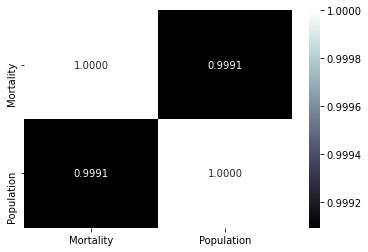

In [21]:
sns.heatmap(statdf.corr(),annot=True,fmt="0.4f",cmap="bone")

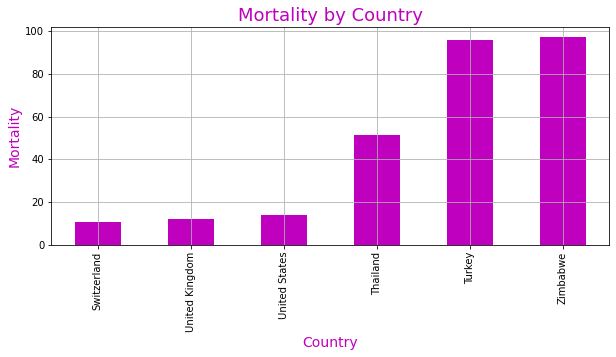

In [22]:
statdf.iloc[:,0][:-1].sort_values().plot(kind="bar",color="m",figsize=(10,4))
plt.title("Mortality by Country",fontsize=18,color="m")
plt.xlabel("Country",fontsize=14,color="m")
plt.ylabel("Mortality",fontsize=14,color="m")
plt.grid()
plt.show()

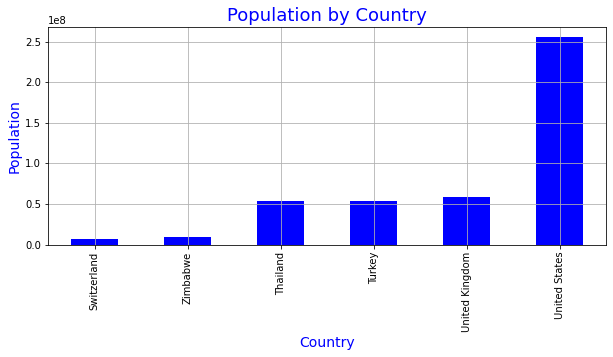

In [23]:
statdf.iloc[:,1][:-1].sort_values().plot(kind="bar",color="b",figsize=(10,4))
plt.title("Population by Country",fontsize=18,color="b")
plt.xlabel("Country",fontsize=14,color="b")
plt.ylabel("Population",fontsize=14,color="b")
plt.grid()
plt.show()

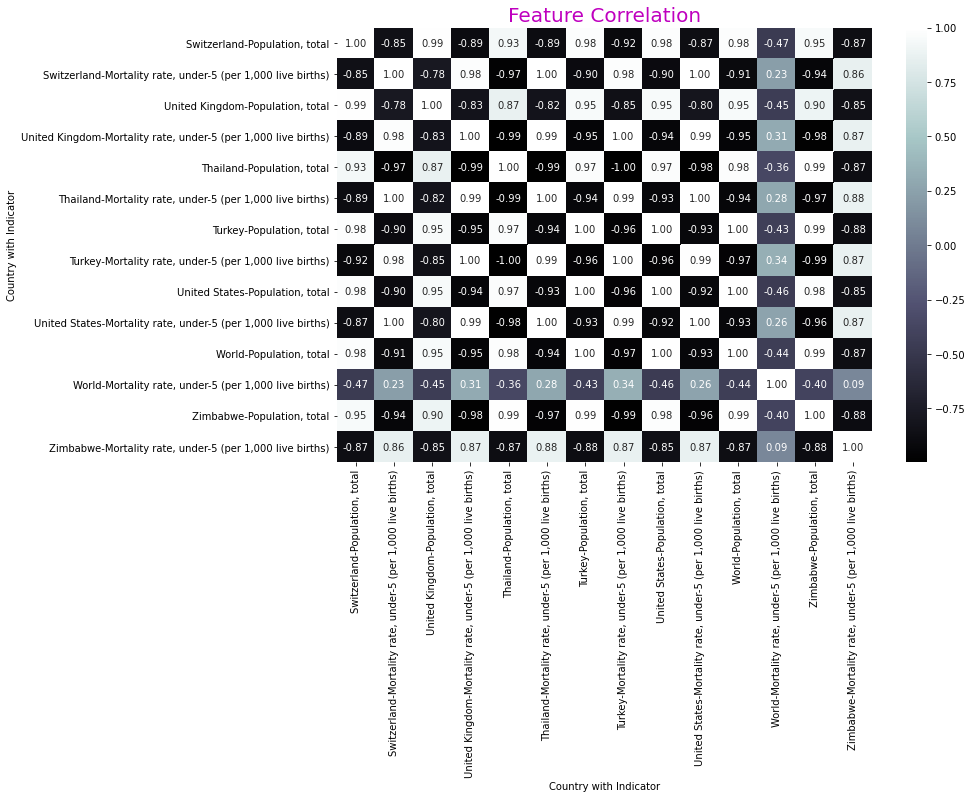

In [24]:
df1cols=df1.columns
df1idx=df1.index
df1arr=np.array(df1.values,float)
df1=pd.DataFrame(df1arr,columns=df1cols,index=df1idx)
plt.figure(figsize=(12,8))
plt.title("Feature Correlation",fontsize=20,color="m")
sns.heatmap(df1.corr(),annot=True,fmt="0.2f",cmap="bone")
plt.show()